In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import os
import shutil

source_dir = '/kaggle/input/plant-disease/plant disease detection'

train_dir = '/kaggle/working/restructured_train'
test_dir = '/kaggle/working/restructured_test'

def restructure_dataset(source_dir, target_train_dir, target_test_dir):
    os.makedirs(target_train_dir, exist_ok=True)
    os.makedirs(target_test_dir, exist_ok=True)

    for plant in os.listdir(source_dir):  
        plant_path = os.path.join(source_dir, plant)
        if os.path.isdir(plant_path):              
            train_path = os.path.join(plant_path, 'Train')
            test_path = os.path.join(plant_path, 'Test')
            
            for disease in os.listdir(train_path):
                disease_path = os.path.join(train_path, disease)
                target_disease_path = os.path.join(target_train_dir, disease)
                os.makedirs(target_disease_path, exist_ok=True)
                
                for file in os.listdir(disease_path):
                    file_path = os.path.join(disease_path, file)
                    if os.path.isfile(file_path):  # Hanya file yang disalin
                        shutil.copy(file_path, target_disease_path)
            
            for disease in os.listdir(test_path):
                disease_path = os.path.join(test_path, disease)
                target_disease_path = os.path.join(target_test_dir, disease)
                os.makedirs(target_disease_path, exist_ok=True)
                
                for file in os.listdir(disease_path):
                    file_path = os.path.join(disease_path, file)
                    if os.path.isfile(file_path):  # Hanya file yang disalin
                        shutil.copy(file_path, target_disease_path)

restructure_dataset(source_dir, train_dir, test_dir)
print("Kategori penyakit di train:", os.listdir(train_dir))
print("Kategori penyakit di test:", os.listdir(test_dir))


Kategori penyakit di train: ['Cercospora Leaf Spot', 'Early Blight', 'Septoria Leaf Spot', 'Powdery Mildew', 'Late Blight', 'Common Rust', 'Cedar Apple Rust', 'Bacterial Spot', 'Black Rot', 'Yellow Leaf Curl Virus', 'Leaf Blight', 'Northern Leaf Blight', 'Leaf Scorch', 'Esca (Black Measles)', 'Apple Scab', 'Healthy']
Kategori penyakit di test: ['Cercospora Leaf Spot', 'Early Blight', 'Septoria Leaf Spot', 'Powdery Mildew', 'Late Blight', 'Common Rust', 'Cedar Apple Rust', 'Bacterial Spot', 'Black Rot', 'Yellow Leaf Curl Virus', 'Leaf Blight', 'Northern Leaf Blight', 'Leaf Scorch', 'Esca (Black Measles)', 'Apple Scab', 'Healthy']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)  
BATCH_SIZE = 32        

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  

train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  
)

print("Kelas penyakit:", train_generator.class_indices)


Found 28999 images belonging to 16 classes.
Found 1354 images belonging to 16 classes.
Kelas penyakit: {'Apple Scab': 0, 'Bacterial Spot': 1, 'Black Rot': 2, 'Cedar Apple Rust': 3, 'Cercospora Leaf Spot': 4, 'Common Rust': 5, 'Early Blight': 6, 'Esca (Black Measles)': 7, 'Healthy': 8, 'Late Blight': 9, 'Leaf Blight': 10, 'Leaf Scorch': 11, 'Northern Leaf Blight': 12, 'Powdery Mildew': 13, 'Septoria Leaf Spot': 14, 'Yellow Leaf Curl Virus': 15}


In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 28999 images belonging to 16 classes.
Found 1354 images belonging to 16 classes.


In [6]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15,  
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


906/906 ━━━━━━━━━━━━━━━━━━━━ 543s 596ms/step - accuracy: 0.3986 - loss: 2.0039 - val_accuracy: 0.6905 - val_loss: 0.9483
Epoch 2/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 76us/step - accuracy: 0.4062 - loss: 1.7849 - val_accuracy: 0.8000 - val_loss: 0.5269
Epoch 3/15


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


906/906 ━━━━━━━━━━━━━━━━━━━━ 530s 584ms/step - accuracy: 0.6289 - loss: 1.1320 - val_accuracy: 0.6689 - val_loss: 1.0799
Epoch 4/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 92us/step - accuracy: 0.5000 - loss: 1.4793 - val_accuracy: 0.8000 - val_loss: 0.6326
Epoch 5/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 530s 583ms/step - accuracy: 0.7360 - loss: 0.8003 - val_accuracy: 0.8445 - val_loss: 0.5276
Epoch 6/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 65us/step - accuracy: 0.8125 - loss: 0.5813 - val_accuracy: 0.9000 - val_loss: 0.4177
Epoch 7/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 532s 586ms/step - accuracy: 0.7863 - loss: 0.6498 - val_accuracy: 0.8772 - val_loss: 0.4005
Epoch 8/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 70us/step - accuracy: 0.7812 - loss: 0.7357 - val_accuracy: 1.0000 - val_loss: 0.0542
Epoch 9/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 534s 588ms/step - accuracy: 0.8120 - loss: 0.5687 - val_accuracy: 0.8854 - val_loss: 0.3849
Epoch 10/15
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 65us/step - accuracy: 0.8125 - loss: 0.5928 - val_ac

43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.8607 - loss: 0.4398
Loss: 0.2973686456680298
Accuracy: 91.14%


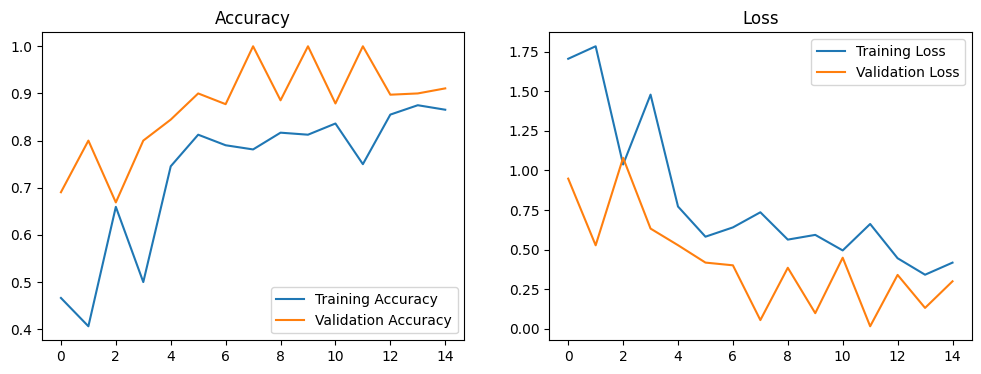

In [7]:
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step
                        precision    recall  f1-score   support

            Apple Scab       1.00      0.76      0.87        51
        Bacterial Spot       0.93      0.83      0.88       137
             Black Rot       0.85      0.71      0.78        98
      Cedar Apple Rust       0.98      0.91      0.94        44
  Cercospora Leaf Spot       0.87      0.80      0.84        41
           Common Rust       0.98      0.96      0.97        48
          Early Blight       0.86      0.88      0.87        97
  Esca (Black Measles)       0.62      1.00      0.76        48
               Healthy       0.97      0.99      0.98       422
           Late Blight       0.96      0.89      0.92        96
           Leaf Blight       0.91      0.98      0.94        43
           Leaf Scorch       0.86      0.98      0.92        45
  Northern Leaf Blight       0.86      0.90      0.88        48
        Powdery Mildew       0.96      1.00      0.98        4

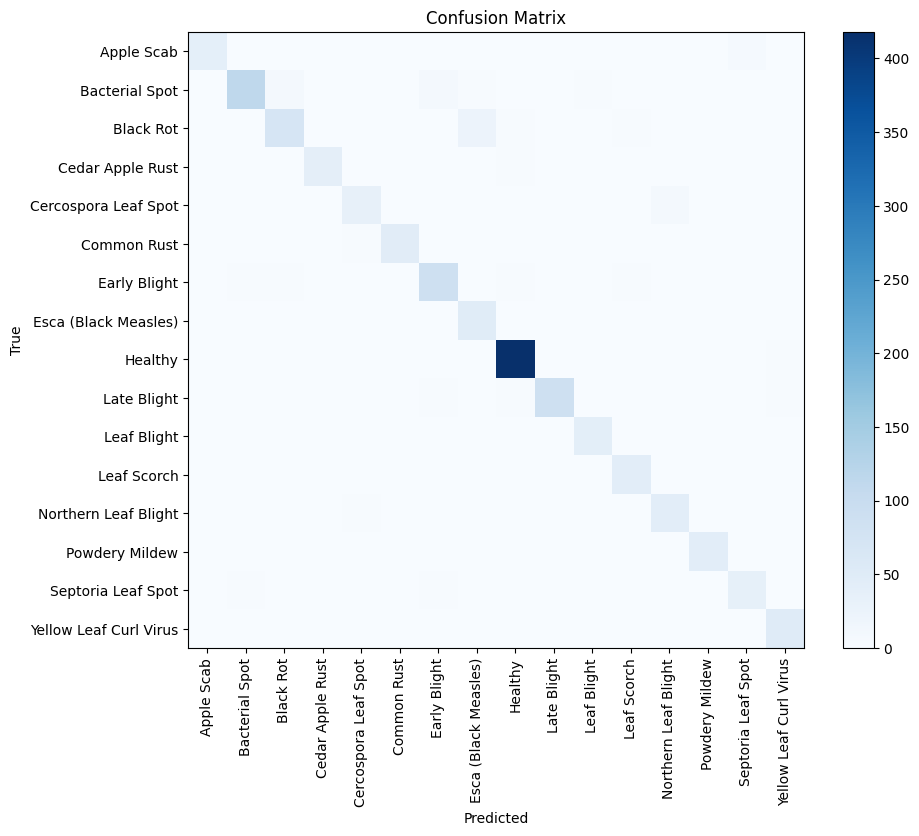

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

categories = list(test_generator.class_indices.keys())

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=categories))

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(categories)), categories, rotation=90)
plt.yticks(np.arange(len(categories)), categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [9]:
model.save('/kaggle/working/plant_disease_model.h5')
print("Model saved as plant_disease_model.h5")

Model saved as plant_disease_model.h5


In [10]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/plant_disease_model.h5')
print("Model berhasil dimuat.")


Model berhasil dimuat.


Model berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


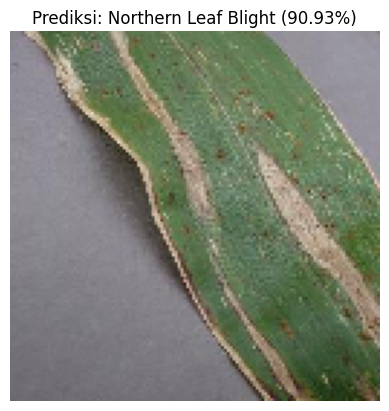

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/kaggle/working/plant_disease_model.h5')
print("Model berhasil dimuat.")

def predict_image(image_path, model, class_names):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    return img, class_names[predicted_class], confidence

image_path = '/kaggle/input/plantvillage/PlantVillage/train/Corn_(maize)___Northern_Leaf_Blight/0118e276-ee7b-4fed-961d-057590ae9f7f___RS_NLB 4666 copy 2.jpg' 
img, predicted_label, confidence = predict_image(image_path, model, list(train_generator.class_indices.keys()))

plt.imshow(img)
plt.title(f"Prediksi: {predicted_label} ({confidence*100:.2f}%)")
plt.axis('off') 
plt.show()


In [13]:
import os

train_dir = '/kaggle/working/restructured_train'

categories = [disease for disease in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, disease))]
print("Kategori penyakit dalam dataset:", categories)


Kategori penyakit dalam dataset: ['Cercospora Leaf Spot', 'Early Blight', 'Septoria Leaf Spot', 'Powdery Mildew', 'Late Blight', 'Common Rust', 'Cedar Apple Rust', 'Bacterial Spot', 'Black Rot', 'Yellow Leaf Curl Virus', 'Leaf Blight', 'Northern Leaf Blight', 'Leaf Scorch', 'Esca (Black Measles)', 'Apple Scab', 'Healthy']


In [14]:
disease_info = {}

for disease in categories:
    disease_info[disease] = {
        "plant": "Unknown Plant",  
        "treatment": "No treatment available yet." 
    }

print(disease_info)


{'Cercospora Leaf Spot': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Early Blight': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Septoria Leaf Spot': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Powdery Mildew': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Late Blight': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Common Rust': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Cedar Apple Rust': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Bacterial Spot': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Black Rot': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Yellow Leaf Curl Virus': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Leaf Blight': {'plant': 'Unknown Plant', 'treatment': 'No treatment available yet.'}, 'Nort

In [15]:
disease_info = {
    # Tomato Diseases
    "Early Blight": {
        "plant": "Tomato",
        "treatment": (
            "Remove infected leaves, avoid overhead watering, "
            "apply fungicides containing chlorothalonil or copper-based fungicides. "
            "Rotate crops annually to reduce recurrence."
        )
    },
    "Late Blight": {
        "plant": "Tomato",
        "treatment": (
            "Use resistant varieties, improve air circulation, "
            "apply fungicides like mancozeb or metalaxyl, "
            "and destroy infected plants to prevent spread."
        )
    },
    "Septoria Leaf Spot": {
        "plant": "Tomato",
        "treatment": (
            "Remove and destroy infected leaves, avoid wetting leaves during watering, "
            "apply fungicides containing chlorothalonil or mancozeb, "
            "and mulch around plants to prevent splashing soil."
        )
    },
    "Tomato Yellow Leaf Curl Virus": {
        "plant": "Tomato",
        "treatment": (
            "Control whiteflies, remove infected plants, "
            "use resistant varieties, and apply neem oil to reduce insect populations."
        )
    },
    "Tomato Mosaic Virus": {
        "plant": "Tomato",
        "treatment": (
            "Avoid handling healthy plants after infected plants, "
            "disinfect tools regularly, and plant resistant varieties."
        )
    },
    "Bacterial Spot": {
        "plant": "Tomato",
        "treatment": (
            "Avoid overhead irrigation, improve air circulation, "
            "and apply copper-based bactericides. Remove infected plants immediately."
        )
    },

    # Apple Diseases
    "Apple Scab": {
        "plant": "Apple",
        "treatment": (
            "Prune infected leaves, improve air circulation, "
            "apply sulfur-based fungicides, and remove fallen leaves in autumn."
        )
    },
    "Black Rot": {
        "plant": "Apple",
        "treatment": (
            "Remove infected fruit and branches, improve drainage, "
            "and apply fungicides like thiophanate-methyl or captan. "
            "Regularly inspect trees for cankers."
        )
    },
    "Cedar Apple Rust": {
        "plant": "Apple",
        "treatment": (
            "Remove nearby cedar trees, apply fungicides containing myclobutanil, "
            "and prune infected leaves. Plant resistant apple varieties."
        )
    },

    # Corn Diseases
    "Common Rust": {
        "plant": "Corn",
        "treatment": (
            "Plant resistant varieties, avoid overhead irrigation, "
            "apply fungicides containing mancozeb or propiconazole, "
            "and rotate crops annually."
        )
    },
    "Northern Leaf Blight": {
        "plant": "Corn",
        "treatment": (
            "Use resistant hybrids, rotate crops, "
            "apply fungicides containing strobilurins or triazoles, "
            "and avoid dense planting."
        )
    },

    # Bell Pepper Diseases
    "Powdery Mildew": {
        "plant": "Bell Pepper",
        "treatment": (
            "Apply sulfur-based fungicides, improve air circulation, "
            "avoid overhead watering, and use resistant varieties."
        )
    },
    "Cercospora Leaf Spot": {
        "plant": "Bell Pepper",
        "treatment": (
            "Use resistant varieties, apply fungicides containing mancozeb, "
            "remove infected leaves, and avoid excessive nitrogen fertilization."
        )
    },
    "Bacterial Spot": {
        "plant": "Bell Pepper",
        "treatment": (
            "Avoid overhead irrigation, improve air circulation, "
            "and apply copper-based bactericides. Remove infected plants immediately."
        )
    },

    # Peach Diseases
    "Bacterial Spot": {
        "plant": "Peach",
        "treatment": (
            "Avoid overhead irrigation, improve air circulation, "
            "and apply copper-based bactericides. Remove infected plants immediately."
        )
    },

    # Grape Diseases
    "Esca (Black Measles)": {
        "plant": "Grape",
        "treatment": (
            "Remove and destroy infected wood, "
            "apply fungicides containing benzimidazole compounds, "
            "and ensure proper vineyard drainage."
        )
    },
    "Leaf Blight (Isariopsis Leaf Spot)": {
        "plant": "Grape",
        "treatment": (
            "Prune infected leaves, avoid overhead watering, "
            "and apply fungicides containing mancozeb or copper compounds."
        )
    },
    "Black Rot": {
        "plant": "Grape",
        "treatment": (
            "Remove infected fruit and branches, improve drainage, "
            "and apply fungicides like thiophanate-methyl or captan. "
            "Regularly inspect trees for cankers."
        )
    },

    # Strawberry Diseases
    "Leaf Scorch": {
        "plant": "Strawberry",
        "treatment": (
            "Remove infected leaves, ensure good air circulation, "
            "apply copper-based fungicides, and avoid overcrowding plants."
        )
    },
    "Septoria Leaf Spot": {
        "plant": "Strawberry",
        "treatment": (
            "Apply fungicides containing mancozeb, remove infected leaves, "
            "and ensure proper crop spacing to reduce humidity."
        )
    },

    # Cherry Diseases
    "Powdery Mildew": {
        "plant": "Cherry",
        "treatment": (
            "Apply sulfur-based fungicides, improve air circulation, "
            "avoid overhead watering, and use resistant varieties."
        )
    },

    # Potato Diseases
    "Early Blight": {
        "plant": "Potato",
        "treatment": (
            "Remove infected foliage, apply fungicides containing chlorothalonil or mancozeb, "
            "and rotate crops to reduce soil-borne pathogens."
        )
    },
    "Late Blight": {
        "plant": "Potato",
        "treatment": (
            "Plant resistant varieties, improve drainage in fields, "
            "apply fungicides like metalaxyl, and destroy infected plants."
        )
    },

    # Healthy
    "Healthy": {
        "plant": "N/A",
        "treatment": "No action needed. The plant is healthy."
    }
}


In [16]:
def predict_image_with_info(image_path, model, class_names, disease_info):
    # Preprocessing gambar
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    predicted_class = class_names[predicted_class_idx]

    # Ambil informasi dari dictionary
    plant = disease_info.get(predicted_class, {}).get("plant", "Unknown Plant")
    treatment = disease_info.get(predicted_class, {}).get("treatment", "No treatment available.")

    return img, predicted_class, confidence, plant, treatment


In [17]:
model.save('/kaggle/working/plant_disease_model_treatment).h5')
print("Model saved as plant_disease_model_treatment.h5")

Model saved as plant_disease_model_treatment.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


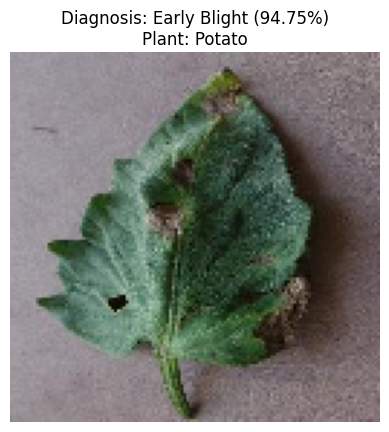

Tumbuhan: Potato
Penyakit: Early Blight
Treatment: Remove infected foliage, apply fungicides containing chlorothalonil or mancozeb, and rotate crops to reduce soil-borne pathogens.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


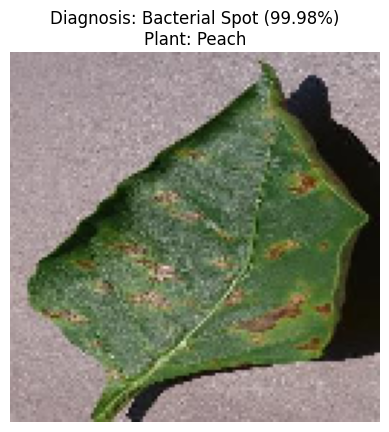

Tumbuhan: Peach
Penyakit: Bacterial Spot
Treatment: Avoid overhead irrigation, improve air circulation, and apply copper-based bactericides. Remove infected plants immediately.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


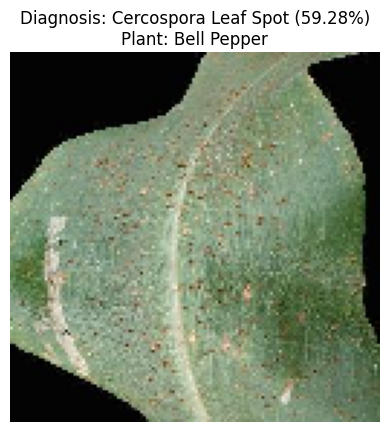

Tumbuhan: Bell Pepper
Penyakit: Cercospora Leaf Spot
Treatment: Use resistant varieties, apply fungicides containing mancozeb, remove infected leaves, and avoid excessive nitrogen fertilization.



In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantdisease/PlantVillage/Tomato_Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG',
    '/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/03bb7042-3fd5-42e1-aa2c-d51d6843704c___JR_B.Spot 8925.JPG',
    '/kaggle/input/plantvillage/PlantVillage/train/Corn_(maize)___Common_rust_/RS_Rust 1572.JPG'
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step
                        precision    recall  f1-score   support

            Apple Scab       1.00      0.76      0.87        51
        Bacterial Spot       0.93      0.83      0.88       137
             Black Rot       0.85      0.71      0.78        98
      Cedar Apple Rust       0.98      0.91      0.94        44
  Cercospora Leaf Spot       0.87      0.80      0.84        41
           Common Rust       0.98      0.96      0.97        48
          Early Blight       0.86      0.88      0.87        97
  Esca (Black Measles)       0.62      1.00      0.76        48
               Healthy       0.97      0.99      0.98       422
           Late Blight       0.96      0.89      0.92        96
           Leaf Blight       0.91      0.98      0.94        43
           Leaf Scorch       0.86      0.98      0.92        45
  Northern Leaf Blight       0.86      0.90      0.88        48
        Powdery Mildew       0.96      1.00      0.98        4

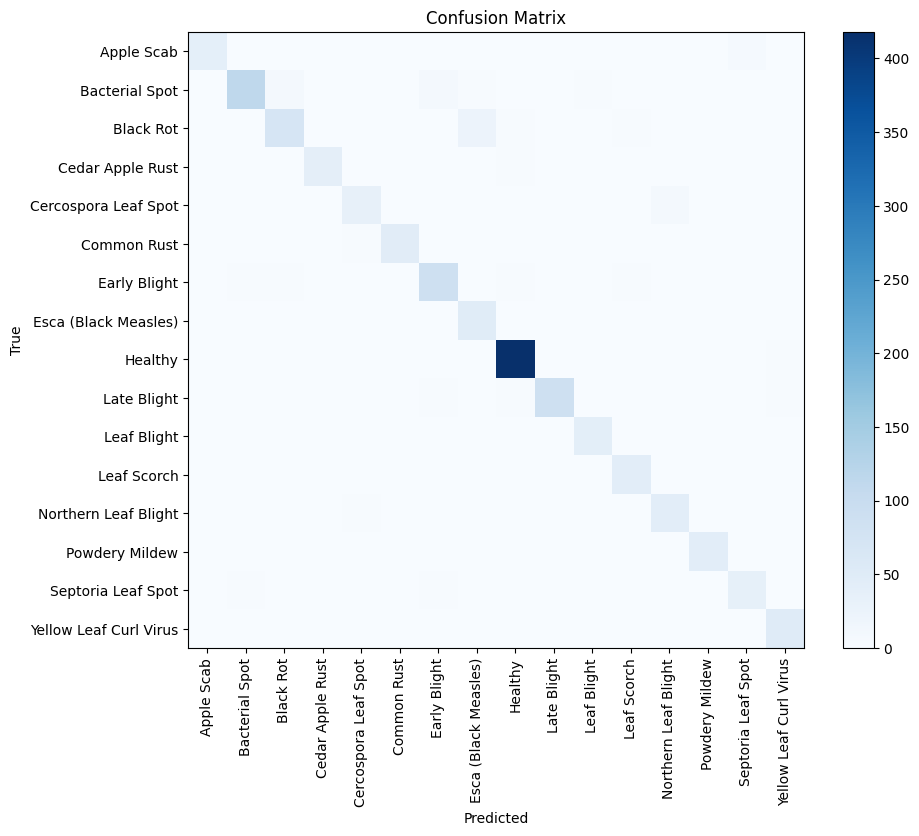

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prediksi pada data validasi
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
model.save('/kaggle/working/plant_disease_model_with_info.h5')
print("Model berhasil disimpan.")


Model berhasil disimpan.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


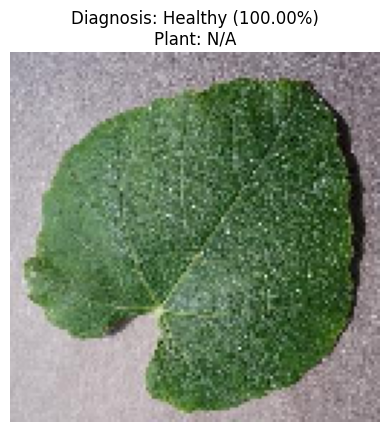

Tumbuhan: N/A
Penyakit: Healthy
Treatment: No action needed. The plant is healthy.



In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


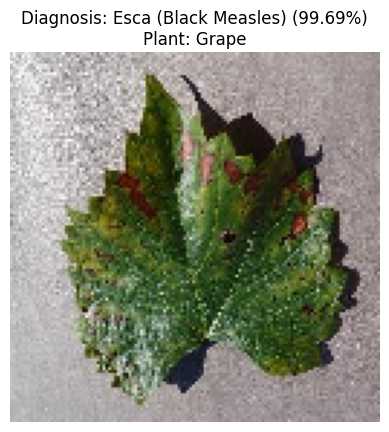

Tumbuhan: Grape
Penyakit: Esca (Black Measles)
Treatment: Remove and destroy infected wood, apply fungicides containing benzimidazole compounds, and ensure proper vineyard drainage.



In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Grape___Esca_(Black_Measles)/01c74b8d-1113-47c0-86a3-6ceea27853c0___FAM_B.Msls 4113.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


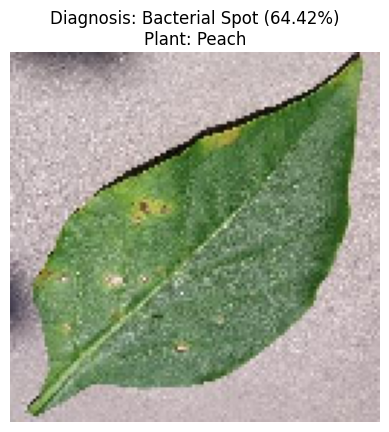

Tumbuhan: Peach
Penyakit: Bacterial Spot
Treatment: Avoid overhead irrigation, improve air circulation, and apply copper-based bactericides. Remove infected plants immediately.



In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Pepper,_bell___Bacterial_spot/02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


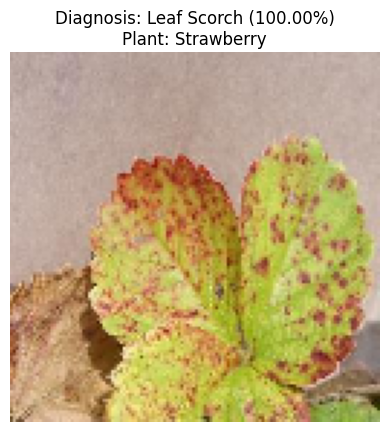

Tumbuhan: Strawberry
Penyakit: Leaf Scorch
Treatment: Remove infected leaves, ensure good air circulation, apply copper-based fungicides, and avoid overcrowding plants.



In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Strawberry___Leaf_scorch/01b7dc2e-af4a-4708-a6ea-4cb19d6f167c___RS_L.Scorch 0072.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


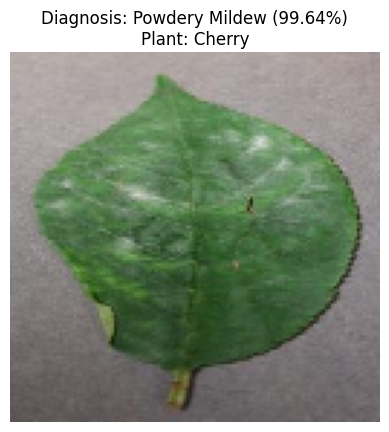

Tumbuhan: Cherry
Penyakit: Powdery Mildew
Treatment: Apply sulfur-based fungicides, improve air circulation, avoid overhead watering, and use resistant varieties.



In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Cherry_(including_sour)___Powdery_mildew/02ecd449-7b27-44d7-b59e-7e31813f0c18___FREC_Pwd.M 0450.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


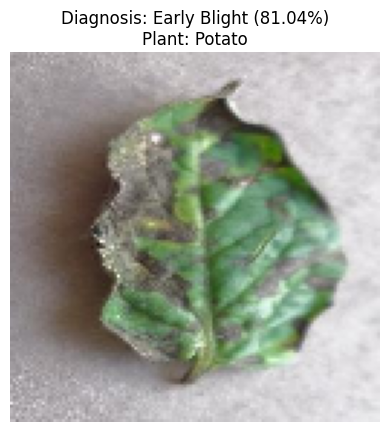

Tumbuhan: Potato
Penyakit: Early Blight
Treatment: Remove infected foliage, apply fungicides containing chlorothalonil or mancozeb, and rotate crops to reduce soil-borne pathogens.



In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Tomato___Early_blight/04e38351-80bc-4260-8a4d-187f7817c3e5___RS_Erly.B 7439.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


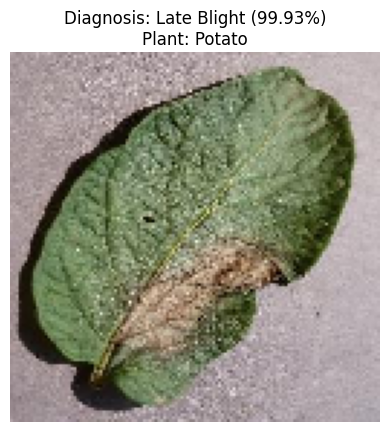

Tumbuhan: Potato
Penyakit: Late Blight
Treatment: Plant resistant varieties, improve drainage in fields, apply fungicides like metalaxyl, and destroy infected plants.



In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Daftar path gambar untuk pengujian
test_images = [
    '/kaggle/input/plantvillage/PlantVillage/train/Potato___Late_blight/025f3c76-6d6c-4dad-ba22-e3e72d084ef1___RS_LB 3105.JPG',
]

# Prediksi untuk setiap gambar
for image_path in test_images:
    img, predicted_label, confidence, plant, treatment = predict_image_with_info(
        image_path, model, class_names, disease_info
    )
    plt.imshow(img)
    plt.title(f"Diagnosis: {predicted_label} ({confidence*100:.2f}%)\nPlant: {plant}")
    plt.axis('off')
    plt.show()

    print(f"Tumbuhan: {plant}")
    print(f"Penyakit: {predicted_label}")
    print(f"Treatment: {treatment}\n")